## Prediksi Harga Property Tebet Jakarta
__Linear Regression__

referensi pembelajaran: 
- https://www.youtube.com/watch?v=N0jbX_yL5iA
- https://medium.com/@adiptamartulandi/memprediksi-harga-rumah-dengan-machine-learning-multivariate-linear-regression-ucupstory-6f0bac830077


dataset: https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah



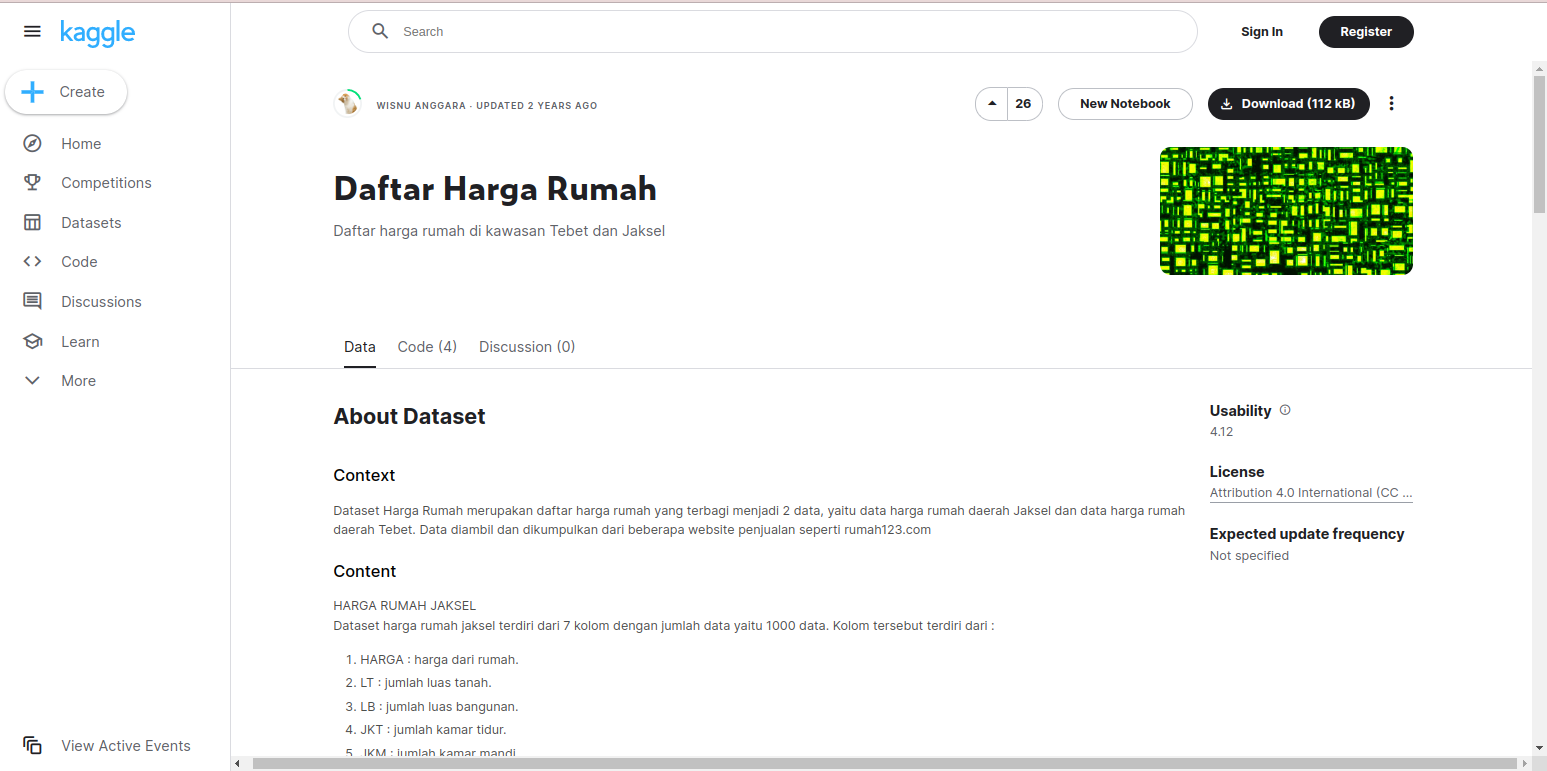

## Persiapan
__Mengimport library yang dibutuhkan__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

__Me-load dataset & menyesuaikan kolom yang ada__

In [2]:
df = pd.read_csv('./data_rumah.csv')
df['harga_jt'] = df['harga'] // 1000000
df.head()

,no,nama_rumah,harga,luas_bangunan,luas_tanah,jumlah_kamar_tidur,jumlah_kamar_mandi,kapasitas_mobil_dalam_garasi,harga_jt
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0,3800
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2,4600
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4,3000
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0,430
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3,9000


__Mengecek apakah ada data yang kosong__

In [3]:
df.isnull().sum()

no                              0
nama_rumah                      0
harga                           0
luas_bangunan                   0
luas_tanah                      0
jumlah_kamar_tidur              0
jumlah_kamar_mandi              0
kapasitas_mobil_dalam_garasi    0
harga_jt                        0
dtype: int64

### Melakukan Analisis Dataset

__Analisis Attribut Luas Bangunan__

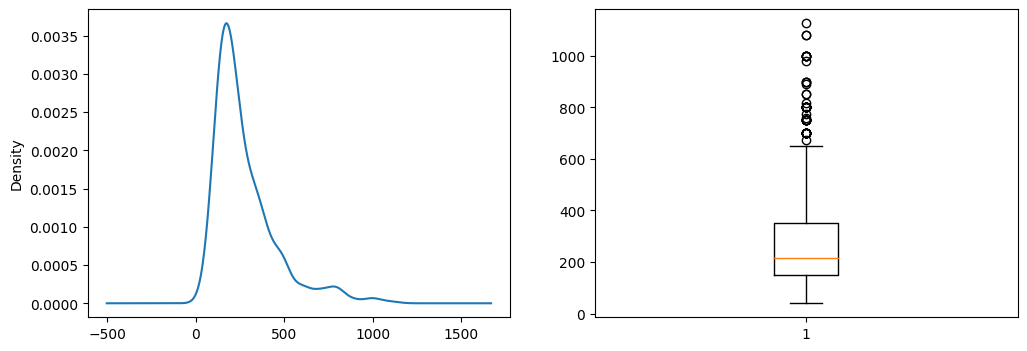

asd


In [4]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
#sns.countplot(x=df['luas_bangunan'])
df['luas_bangunan'].plot(kind="kde")

f.add_subplot(1,2,2)
plt.boxplot(df['luas_bangunan'])
plt.show()
print('asd')

__Analisis Attribut Luas Bangunan__

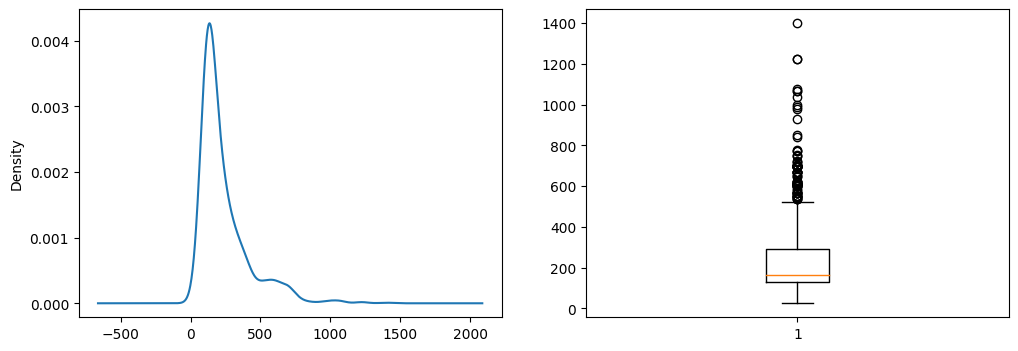

In [5]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
# sns.countplot(x=df['luas_tanah'])
df['luas_tanah'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['luas_tanah'])
plt.show()

__Analisis Attribut Luas Bangunan__

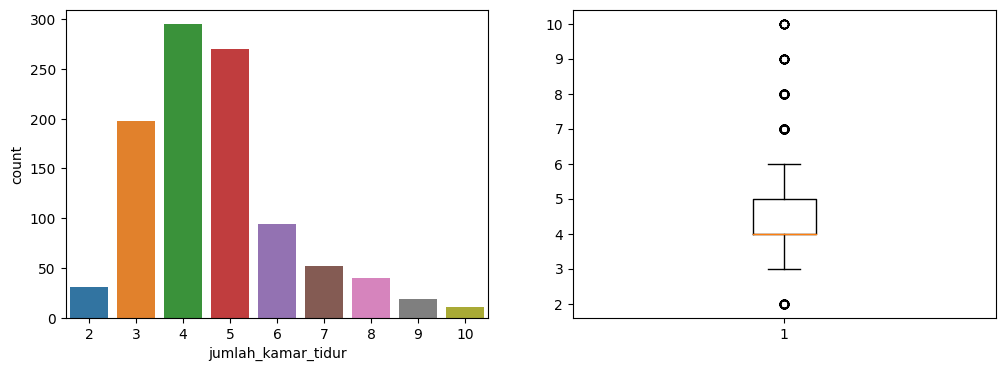

In [6]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(x=df['jumlah_kamar_tidur'])

f.add_subplot(1,2,2)
plt.boxplot(df['jumlah_kamar_tidur'])
plt.show()

__Analisis Attribut Luas Bangunan__

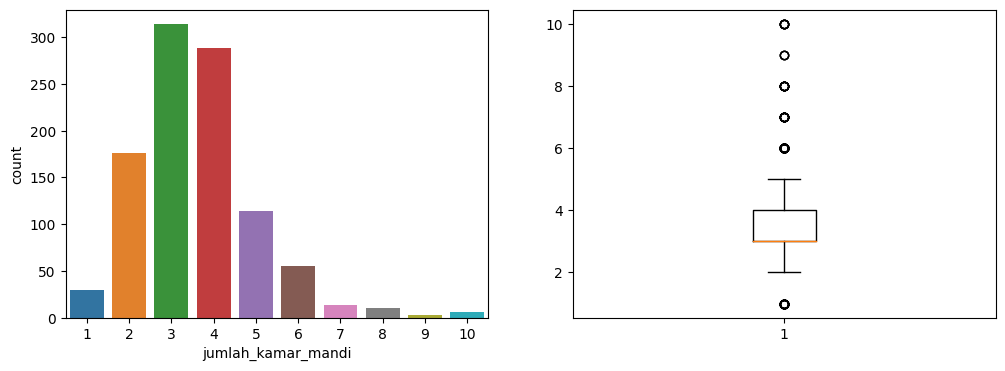

In [7]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(x=df['jumlah_kamar_mandi'])

f.add_subplot(1,2,2)
plt.boxplot(df['jumlah_kamar_mandi'])
plt.show()

__Analisis Attribut Luas Bangunan__

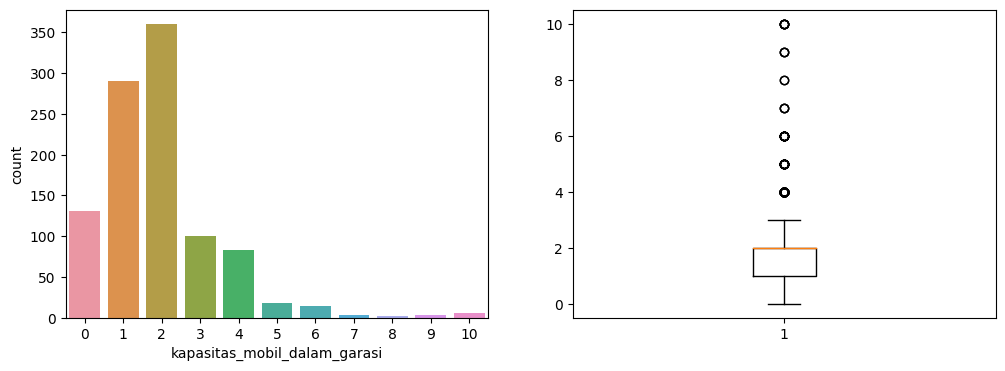

In [8]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(x=df['kapasitas_mobil_dalam_garasi'])

f.add_subplot(1,2,2)
plt.boxplot(df['kapasitas_mobil_dalam_garasi'])
plt.show()

__Pair plot untuk melihat relasi antara variabel2 X terhadap variable Y__

<Figure size 1000x800 with 0 Axes>

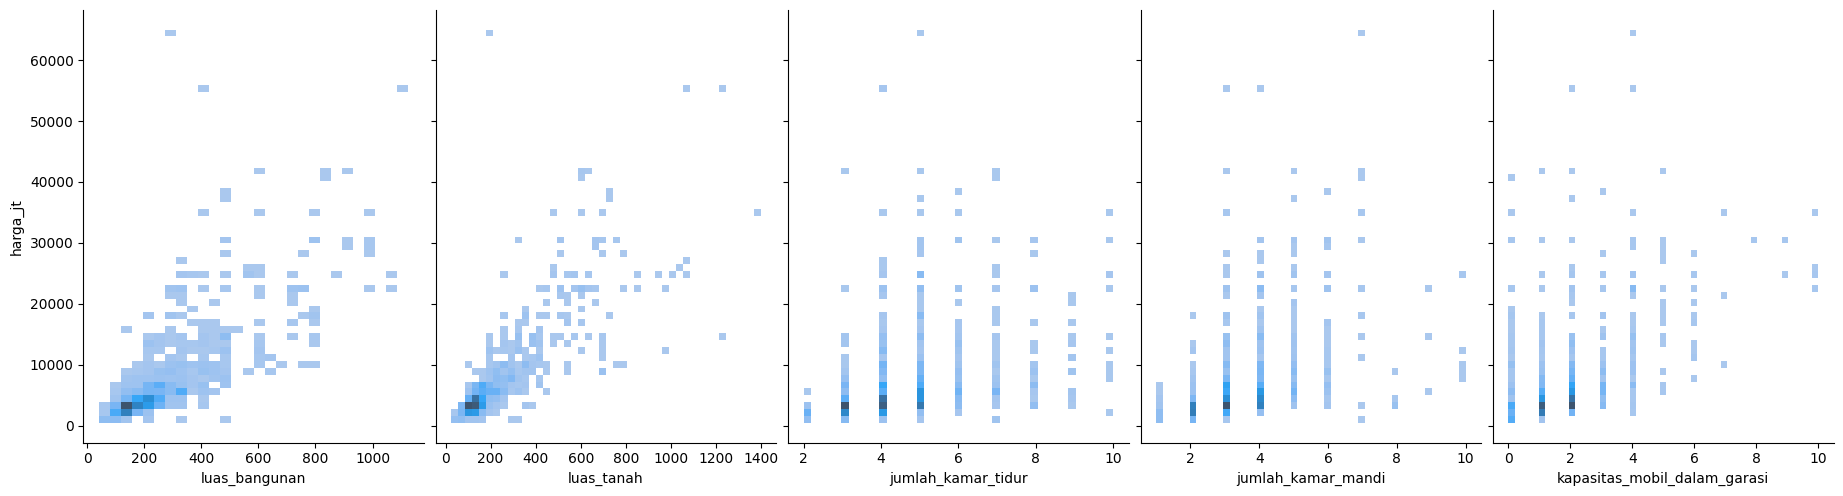

In [9]:
plt.figure(figsize=(10,8))
sns.pairplot(
	data=df,
	x_vars=['luas_bangunan', 'luas_tanah', 'jumlah_kamar_tidur', 'jumlah_kamar_mandi', 'kapasitas_mobil_dalam_garasi'],
	y_vars=['harga_jt'],
	height=5,
	aspect=0.75,
	kind='hist'
)

# ENDS HERE
---

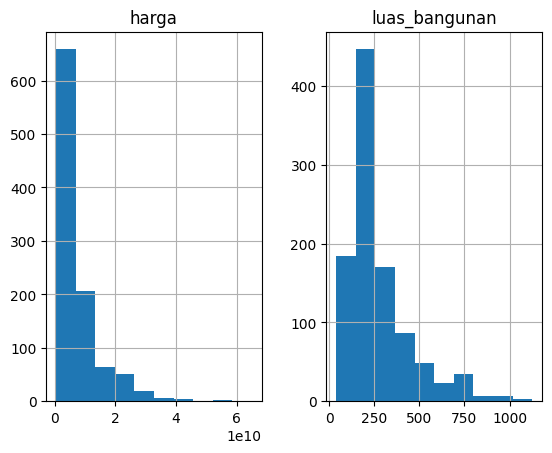

In [10]:
vis = df[['nama_rumah','harga','luas_bangunan']]
vis.hist()
plt.show()

### Visualisasi hubungan antara luas bangunan dengan harga

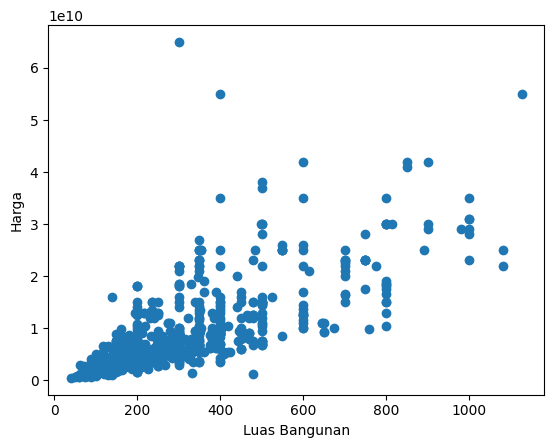

In [11]:
plt.scatter(df.luas_bangunan, df.harga)
plt.xlabel("Luas Bangunan")
plt.ylabel("Harga")
plt.show()

# New Section

## Penerapan Regresi Linear sederhana

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [13]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['luas_bangunan']])
train_y = np.asanyarray(train[['harga']])
regr.fit (train_x, train_y)
# Mencari Coeficient & Intercept
print("Coeficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coeficient:  [[30304557.97588773]]
Intercept:  [-7.73800679e+08]


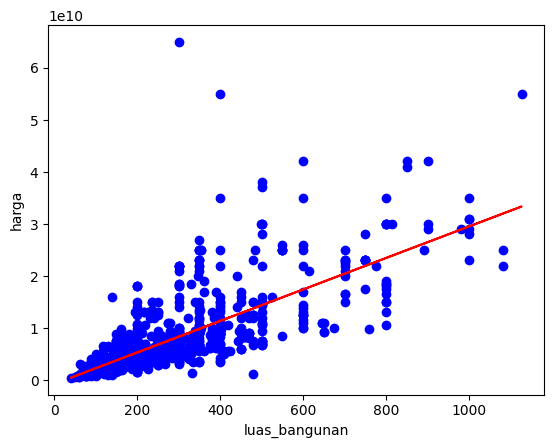

In [14]:
plt.scatter(df.luas_bangunan, df.harga, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='red')
plt.xlabel("luas_bangunan")
plt.ylabel("harga")
plt.show()